In [1]:
import numpy as np
from datasets.dataloader import *

loader,target_loader=get_train_loader("./data/processed/R/","./data/processed/V/")

torch_to_image = transforms.Compose([
    transforms.Normalize(mean=(-1,-1,-1), std=(2,2,2)),  # [-1, 1] to [0, 1]
    transforms.ToPILImage()
])
x=next(iter(loader))
print(x.shape)
if (x.shape)[1]==1:
    generated_images=torch_to_image(torch.cat([x,x,x],1)[0])



#torch_to_image(next(iter(loader)))

torch.Size([8, 1, 512, 512])


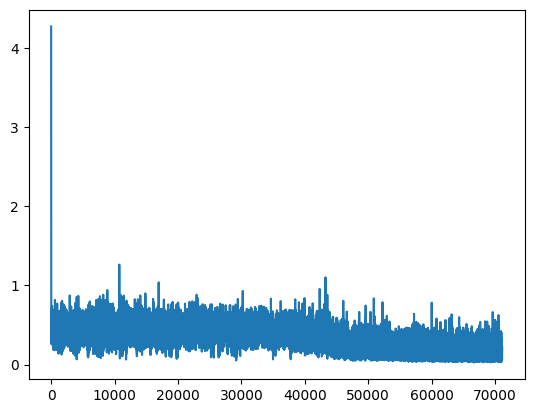

In [11]:
import matplotlib.pyplot as plt
checkpoint=torch.load('./checkpoints/CycleGAN/NonResizig_Gray_100epoch/checkpoint-epoch-90.ckpt')
plt.plot(checkpoint['loss_D_y_hist'])

In [3]:
from PIL import Image
import numpy as np
import glob
import cv2
path=glob.glob("./data/processed/R/*.jpg")
path_V=glob.glob("./generated_images/COS_Histogram_matching//*.jpg")
base_shape=np.array(Image.open(path_V[0])).shape
for pa in path_V:
    im=cv2.imread(pa)
    print(im.shape)
    if np.array(im).shape!=base_shape:
        print("except_size")
        print(pa)
        print(np.array(im).shape)


(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V02872.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V02990.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V01358.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V02817.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V03164.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V02050.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V00546.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V03480.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V03374.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V00560.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./

# evaluation dataset making
- 4 randomcrop

In [2]:
from PIL import Image
import numpy as np
import glob
from utils import *
from datasets.dataloader import *
import torchvision.transforms as transforms

path=glob.glob("./data/processed/R/*.jpg")
path_V=glob.glob("./data/processed/V/*.jpg")
loader=get_eval_loader('./generated_images/COS_Histogram_matching',resizing=[1024,2048])
torch_to_image = transforms.Compose([
        transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
        transforms.ToPILImage()
    ])
q=0
for batch in loader:
    for im in batch:
        for i in range(4):
            croped=transforms.RandomCrop(512)(im)
            croped=torch.cat([croped,croped,croped],0)
            croped=torch_to_image(croped)
            #croped.save("./data/for_eval_noncrop/{}.jpg".format(q))
            croped.save("./generated_images/COS_for_eval/{}.jpg".format(q))
            q+=1




Preparing DataLoader for the evaluation phase...


# evaluation 코드 체크용
## FID

In [6]:
# TODO
from models.base_model import BaseGenerator
import torch
from datasets.dataloader import *
import os
import shutil
from metric.fid import *
def generate_test_sample(model,dataloader,save_path,device=torch.device('cpu')):
    torch_to_image = transforms.Compose([
        transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
        transforms.ToPILImage()
    ])
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    k=0
    for batch in dataloader:
        for im in batch:
            croped=transforms.CenterCrop(512)(im)
            sample=model(croped.unsqueeze(0).to(device))
            sample=torch.cat([sample,sample,sample],1)
            sample=torch_to_image(sample[0])
            sample.save(os.path.join(save_path,(str(k)+'.jpg')))
            k+=1
def calculate_fid(model,data_loader,save_path,base_path ,img_size=256,batch_size=50,device=torch.device('cpu')):
    # after generate sample and calculate fid
    
    generate_test_sample(model,data_loader,save_path,device=device)
    fid=calculate_fid_given_paths([base_path,save_path],img_size,batch_size)
    shutil.rmtree(save_path)
    return fid

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model=BaseGenerator(n_res=2).to(device)
#new_img.save("./generated_images/CycleGAN_Sample/{}.jpg".format(k))
eval_loader=get_eval_loader(root="./data/processed/V", batch_size=4, shuffle=False)

calculate_fid(model,eval_loader,os.path.join("./generated_images","test"),"./data/for_eval_noncrop",device=device)

cuda
Preparing DataLoader for the evaluation phase...
Calculating FID given paths ./data/for_eval_noncrop and ./generated_images/test...


/home/poong/yes/envs/jaepoong/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/poong/yes/envs/jaepoong/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


cuda


100%|██████████| 72/72 [00:05<00:00, 12.86it/s]


312.8881045106264

In [23]:
import os
import shutil
os.mkdir(os.path.join("./generated_images","test"))
shutil.rmtree(os.path.join("./generated_images","test"))

In [4]:
from models.base_model import BaseGenerator
import torch
from datasets.dataloader import *
import os
import shutil
from metric.fid import *

def generate_test_sample(model,dataloader,save_path,device=torch.device('cpu')):
    torch_to_image = transforms.Compose([
        transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
        transforms.ToPILImage()
    ])
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    k=0
    for batch in dataloader:
        for im in batch:
            croped=transforms.CenterCrop(512)(im)
            sample=model(croped.unsqueeze(0).to(device))
            sample=torch.cat([sample,sample,sample],1)
            sample=torch_to_image(sample[0])
            sample.save(os.path.join(save_path,(str(k)+'.jpg')))
            k+=1
def calculate_fid(model,data_loader,save_path,base_path ,img_size=256,batch_size=50,device=torch.device('cpu')):
    # after generate sample and calculate fid
    
    generate_test_sample(model,data_loader,save_path,device=device)
    fid=calculate_fid_given_paths([base_path,save_path],img_size,batch_size)
    shutil.rmtree(save_path)
    return fid

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model=BaseGenerator(n_res=2).to(device)
#new_img.save("./generated_images/CycleGAN_Sample/{}.jpg".format(k))
eval_loader=get_eval_loader(root="./data/processed/V", batch_size=4, shuffle=False)

fid=calculate_fid_given_paths(["./generated_images/test","./data/for_eval_noncrop"])
fid

cuda
Preparing DataLoader for the evaluation phase...
Calculating FID given paths ./generated_images/test and ./data/for_eval_noncrop...
cuda


100%|██████████| 81/81 [00:05<00:00, 15.35it/s]


272.5836284341297

In [7]:
from models.base_model import BaseGenerator
import torch
from datasets.dataloader import *
import os
import shutil
from metric.fid import *
fid=calculate_fid_given_paths(["./data/for_eval","./generated_images/CycleGAN/AttU_Net_for_eval"])
fid

Calculating FID given paths ./data/for_eval and ./generated_images/CycleGAN/AttU_Net_for_eval...
cuda


100%|██████████| 285/285 [00:20<00:00, 13.86it/s]


15.721833321959082

## PR

In [ ]:
from models.base_model import BaseGenerator
import torch
from datasets.dataloader import *
import os
import shutil
from metric.pr import *

def calculate_pr(model,dataloader,save_path,path_real,batch_size=50,k=3,num_samples=5000,device=torch.device('cpu')):
    #generate_test_sample(model,dataloader,save_path,device)
    ipr=IPR(batch_size,k,num_samples)
    
    with torch.no_grad():
        ipr.compute_manifold(path_real)
        precision,recall=ipr.precision_and_recall(save_path)
    shutil.rmtree(save_path)
    return precision,recall
        
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model=BaseGenerator(n_res=2).to(device)
#new_img.save("./generated_images/CycleGAN_Sample/{}.jpg".format(k))
eval_loader=get_eval_loader(root="./data/processed/V", batch_size=4, shuffle=False)

#calculate_pr(model,eval_loader,os.path.join("./generated_images","test"),"./data/for_eval_noncrop",device=device)
calculate_pr(model,eval_loader,"./data/for_eval","./generated_images/SSIM_Histogram_matching",device=device)

# Generator Discriminator output size

In [1]:
from models.base_model import *
import torch.nn as nn
from models import load_Generator,load_Discriminator


import torch
noise=torch.normal(0,1,size=(1,1,512,512)).to('cuda')
model=AttU_Net().to('cuda')
model(noise).shape

torch.Size([1, 1, 512, 512])

In [ ]:
from torchsummary import summary as summary
summary(model,(1,512,512))

In [1]:
import torch.nn as nn
from models.base_model import *

import torch
noise=torch.normal(0,1,size=(1,1,512,512))
model=BaseGenerator()
model=BaseDiscriminator()
model(noise).shape

torch.Size([1, 1, 27, 27])

In [1]:
from models.base_model import *
import torch
noise=torch.normal(0,1,size=(1,1,512,512)).to('cuda')
D=BaseDiscriminator().to('cuda')
a=D(noise)


In [2]:
from torchsummary import summary
summary(D,(1, 512, 512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 510, 510]             576
    InstanceNorm2d-2         [-1, 64, 510, 510]               0
              ReLU-3         [-1, 64, 510, 510]               0
            Conv2d-4         [-1, 64, 508, 508]          36,864
    InstanceNorm2d-5         [-1, 64, 508, 508]               0
              ReLU-6         [-1, 64, 508, 508]               0
            Conv2d-7         [-1, 64, 253, 253]          36,864
    InstanceNorm2d-8         [-1, 64, 253, 253]               0
              ReLU-9         [-1, 64, 253, 253]               0
           Conv2d-10         [-1, 64, 251, 251]          36,864
   InstanceNorm2d-11         [-1, 64, 251, 251]               0
             ReLU-12         [-1, 64, 251, 251]               0
           Conv2d-13        [-1, 128, 125, 125]          73,728
   InstanceNorm2d-14        [-1, 128, 1

# sample Image making using pretrained network

In [1]:
import numpy as np
from datasets.dataloader import *
from models.base_model import *
import torch
from PIL import Image
import glob

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loader=get_eval_loader(root="./data/processed/V", batch_size=1, shuffle=False)


model=AttU_Net().to(device).eval()
checkpoint=torch.load('./checkpoints/CycleGAN/AttU_Net/best.ckpt')
model.load_state_dict(checkpoint['G_state_dict'])
torch_to_image = transforms.Compose([
        transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
        transforms.ToPILImage()
    ])
k=0
for batch in loader:
    for i in range(4):
        generated_image=transforms.RandomCrop(512)(batch)
        generated_image=model(generated_image.to(device))
        result=model(generated_image.to(device))
        result=torch.cat([result,result,result],1)
        result=torch_to_image(result[0])
        result.save("./generated_images/CycleGAN/AttU_Net_for_eval/{}.jpg".format(k))
        
        k+=1
        break
        

Preparing DataLoader for the evaluation phase...


- display entire result in model
- save generated valid sample

Preparing DataLoader for the evaluation phase...


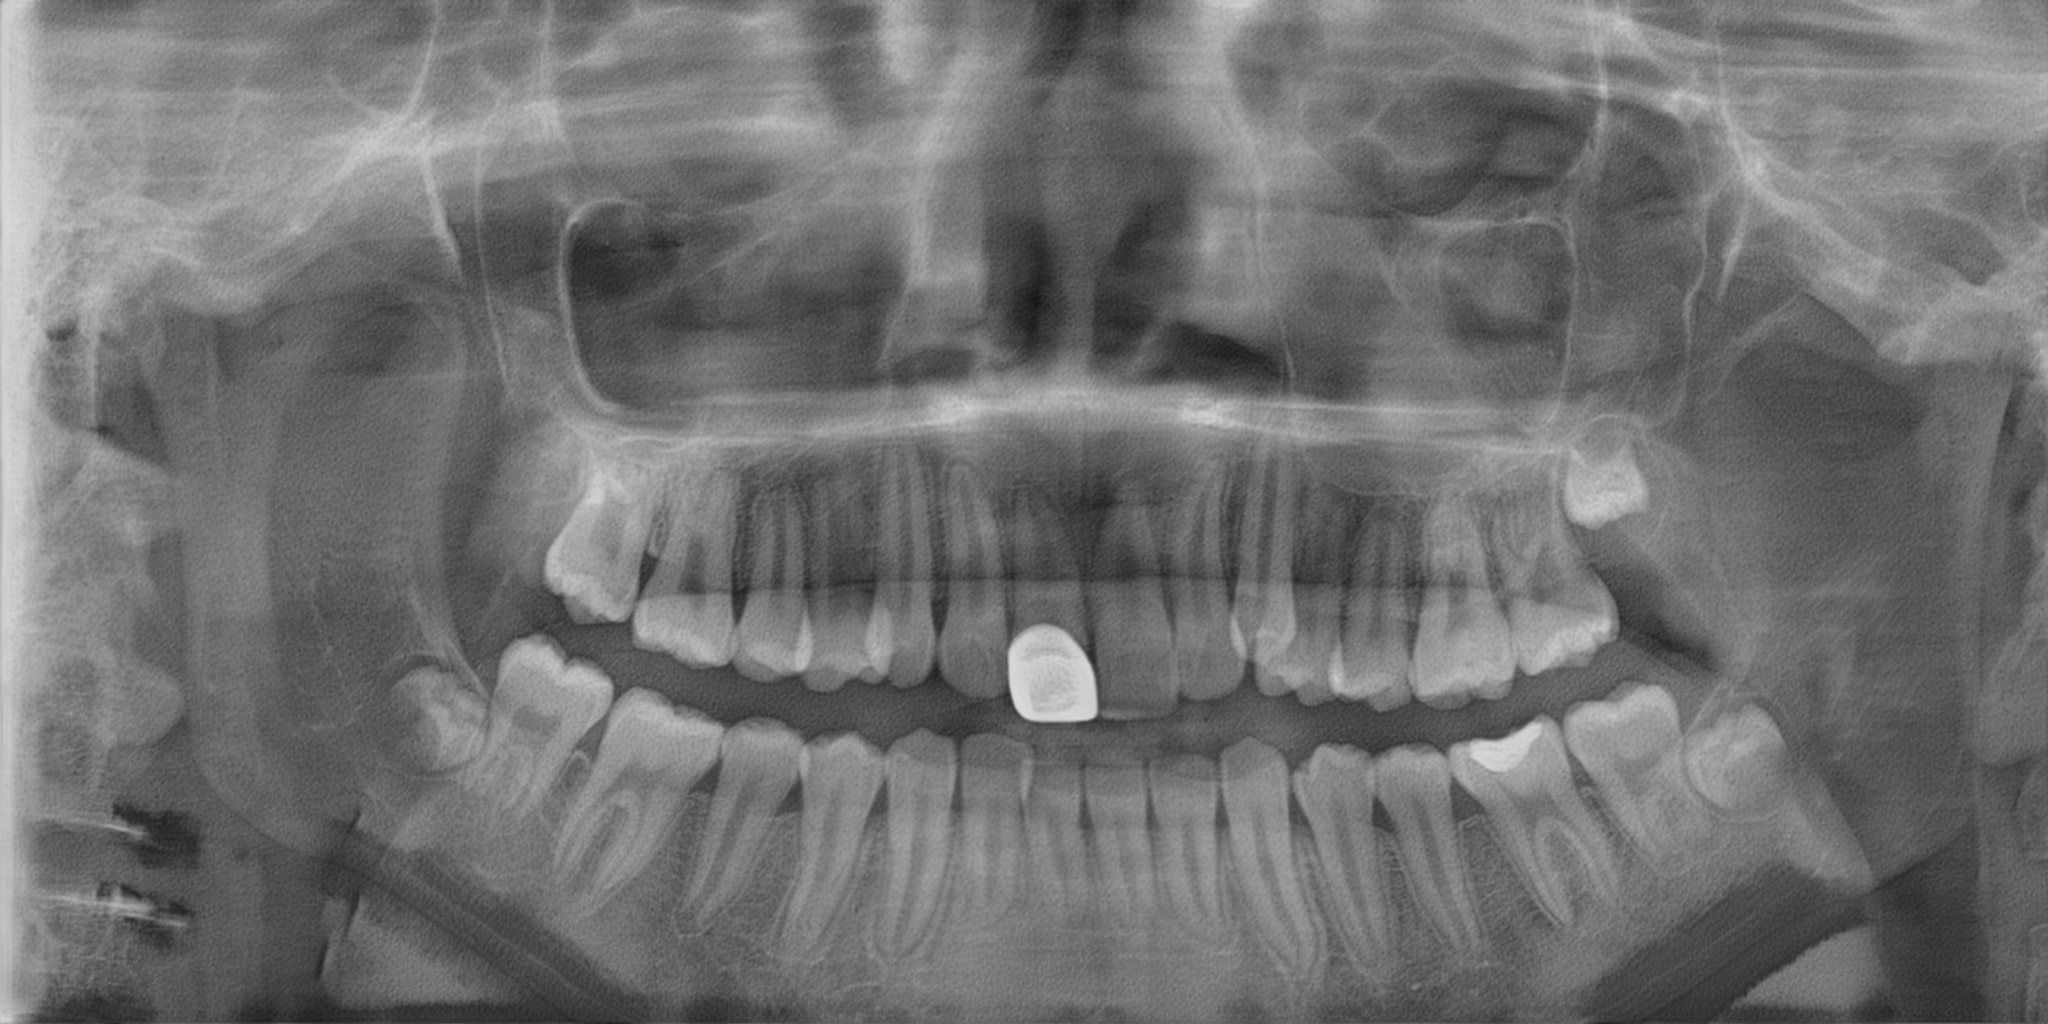

In [1]:
import numpy as np
from datasets.dataloader import *
from models.base_model import *
import torch
from PIL import Image
import glob

device = torch.device('cuda:5' if torch.cuda.is_available() else 'cpu')
loader=get_eval_loader(root="./data/processed/V", batch_size=1, shuffle=False)


model=AttU_Net().to(device).eval()
#checkpoint=torch.load('./checkpoints/CycleGAN/Base/checkpoint-epoch-60.ckpt')
checkpoint=torch.load('./checkpoints/CycleGAN/AttU_Net/best.ckpt')
model.load_state_dict(checkpoint['G_state_dict'])
torch_to_image = transforms.Compose([
        transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
        transforms.ToPILImage()
    ])
root=np.array(loader.dataset.samples)
root=list(map(lambda x: os.path.basename(x),root))
k=0
with torch.no_grad():
    for batch in loader:
        generated_image=model(batch.to(device))
        result=model(generated_image.to(device))
        result=torch.cat([result,result,result],1)
        result=torch_to_image(result[0])
        #result.save('./generated_images/generated_samples/Base/{}.jpg'.format(root[k]))
        k+=1
        if k==1:
            display(result)
            break
        



# sample with matching indices

- 지정 indice sample 생성

Preparing DataLoader for the evaluation phase...


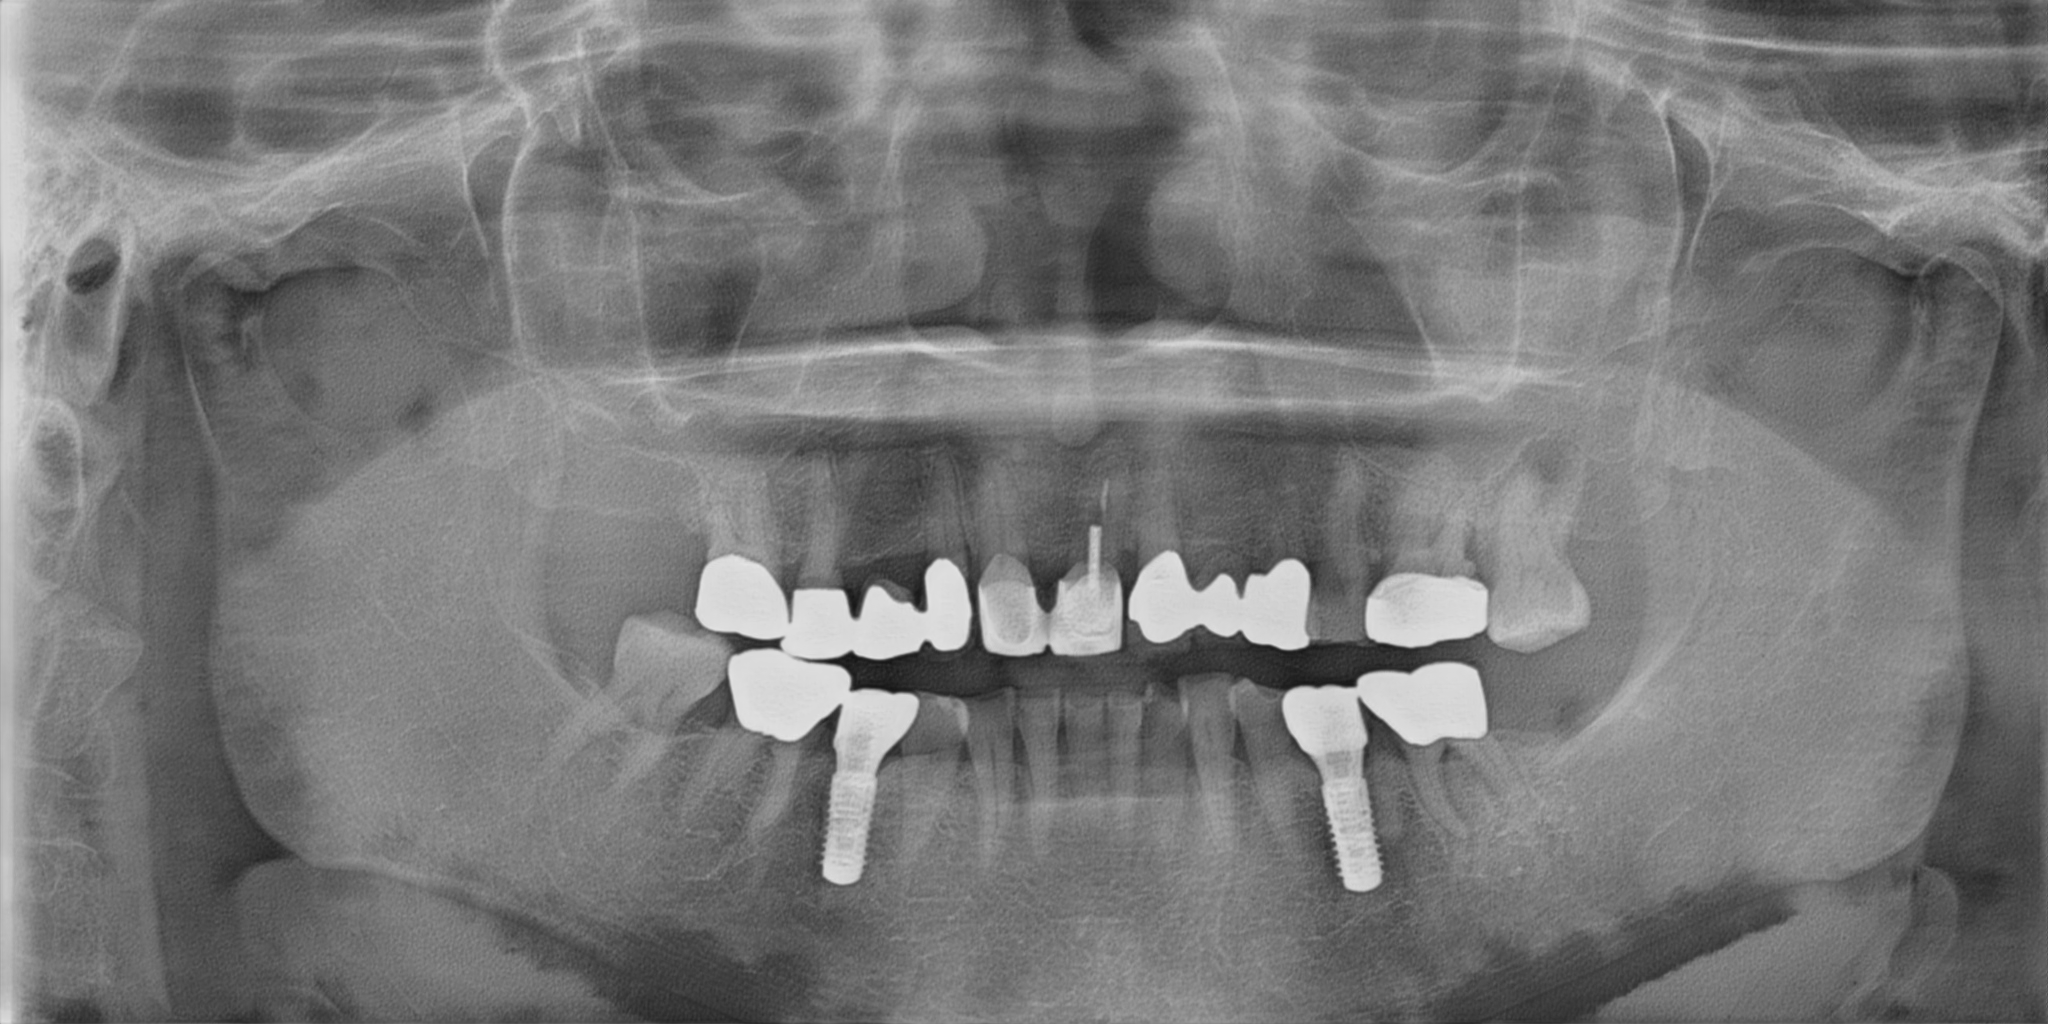

In [25]:
import numpy as np
from datasets.dataloader import *
from models.base_model import *
import torch
from PIL import Image
import glob
import cv2

path=sorted(glob.glob("./data/processed/R/*.jpg"))
path_V=sorted(glob.glob("./data/processed/V/*.jpg"))
device = torch.device('cuda:5' if torch.cuda.is_available() else 'cpu')
loader=get_eval_loader(root="./data/processed/V", batch_size=1, shuffle=False)


model=AttU_Net().to(device).eval()
#checkpoint=torch.load('./checkpoints/CycleGAN/Base/checkpoint-epoch-60.ckpt')
checkpoint=torch.load('./checkpoints/CycleGAN/AttU_Net/best.ckpt')
model.load_state_dict(checkpoint['G_state_dict'])

torch_to_image = transforms.Compose([
        transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
        transforms.ToPILImage()
    ]) # change model result to PIL image, it need [c,h,w] not batch, with 3channel gray

transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5,0.5,0.5],
                                 std=[0.5,0.5,0.5])
            ]) # PIL image to tensor


with torch.no_grad(): #inference 
    im=transforms.Grayscale(num_output_channels=1)(transform(Image.open(sorted(path_V)[1224]).convert('RGB'))).to(device)
    
    result=model(im.unsqueeze(0))
    result=torch.cat([result,result,result],1)
    result=torch_to_image(result[0])
    display(result)

- csv파일 기반 matching data 생성

In [1]:
import numpy as np
from datasets.dataloader import *
from models.base_model import *
import torch
from PIL import Image,ImageDraw,ImageFont
import glob
import cv2
import csv
import numpy as np
f = open('./data/cut.csv', 'r', encoding='utf-8-sig')
rdr = csv.reader(f)

path=sorted(glob.glob("./data/processed/R/*.jpg"))
path_V=sorted(glob.glob("./data/processed/V/*.jpg"))
device = torch.device('cuda:5' if torch.cuda.is_available() else 'cpu')


model=AttU_Net().to(device).eval()
#checkpoint=torch.load('./checkpoints/CycleGAN/Base/checkpoint-epoch-60.ckpt')
checkpoint=torch.load('./checkpoints/CycleGAN/AttU_Net/best.ckpt')
model.load_state_dict(checkpoint['G_state_dict'])

torch_to_image = transforms.Compose([
        transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
        transforms.ToPILImage()
    ]) # change model result to PIL image, it need [c,h,w] not batch, with 3channel gray

transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5,0.5,0.5],
                                 std=[0.5,0.5,0.5])
            ]) # PIL image to tensor
font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSans.ttf", 50) # 폰트 지정

for paths in rdr:
    # R사
    R=Image.open(os.path.join('./data/processed/R',paths[0]+'.jpg'))
    shap=R.size
    new_image=Image.new('RGB',(3*(shap[0]),(R.size)[1]),(256,256,256))
    with torch.no_grad(): #inference 
        # V사
        im=Image.open(os.path.join('./data/processed/V',paths[1]+'.jpg'))
        new_image.paste(im,(0,0))
        
        im=transforms.Grayscale(num_output_channels=1)(transform(im.convert('RGB'))).to(device)

        result=model(im.unsqueeze(0))
        result=torch.cat([result,result,result],1)
        converted=torch_to_image(result[0])
        # converted
        new_image.paste(converted,((shap[0]),0))
        # R사
        new_image.paste(R,(2*(shap[0]),0))
        # 글자 넣어주기
        draw=ImageDraw.Draw(new_image)
        draw.text((0,10), "{}".format(paths[1]), (250,0,0), font=font)
        draw.text((shap[0],10), "transformed V", (250,0,0), font=font)
        draw.text((2*shap[0],10), "{}".format(paths[0]), (250,0,0), font=font)

        
    
    new_image.save("./data/pair/{}_{}.jpg".format(paths[0],paths[1]),"JPEG")


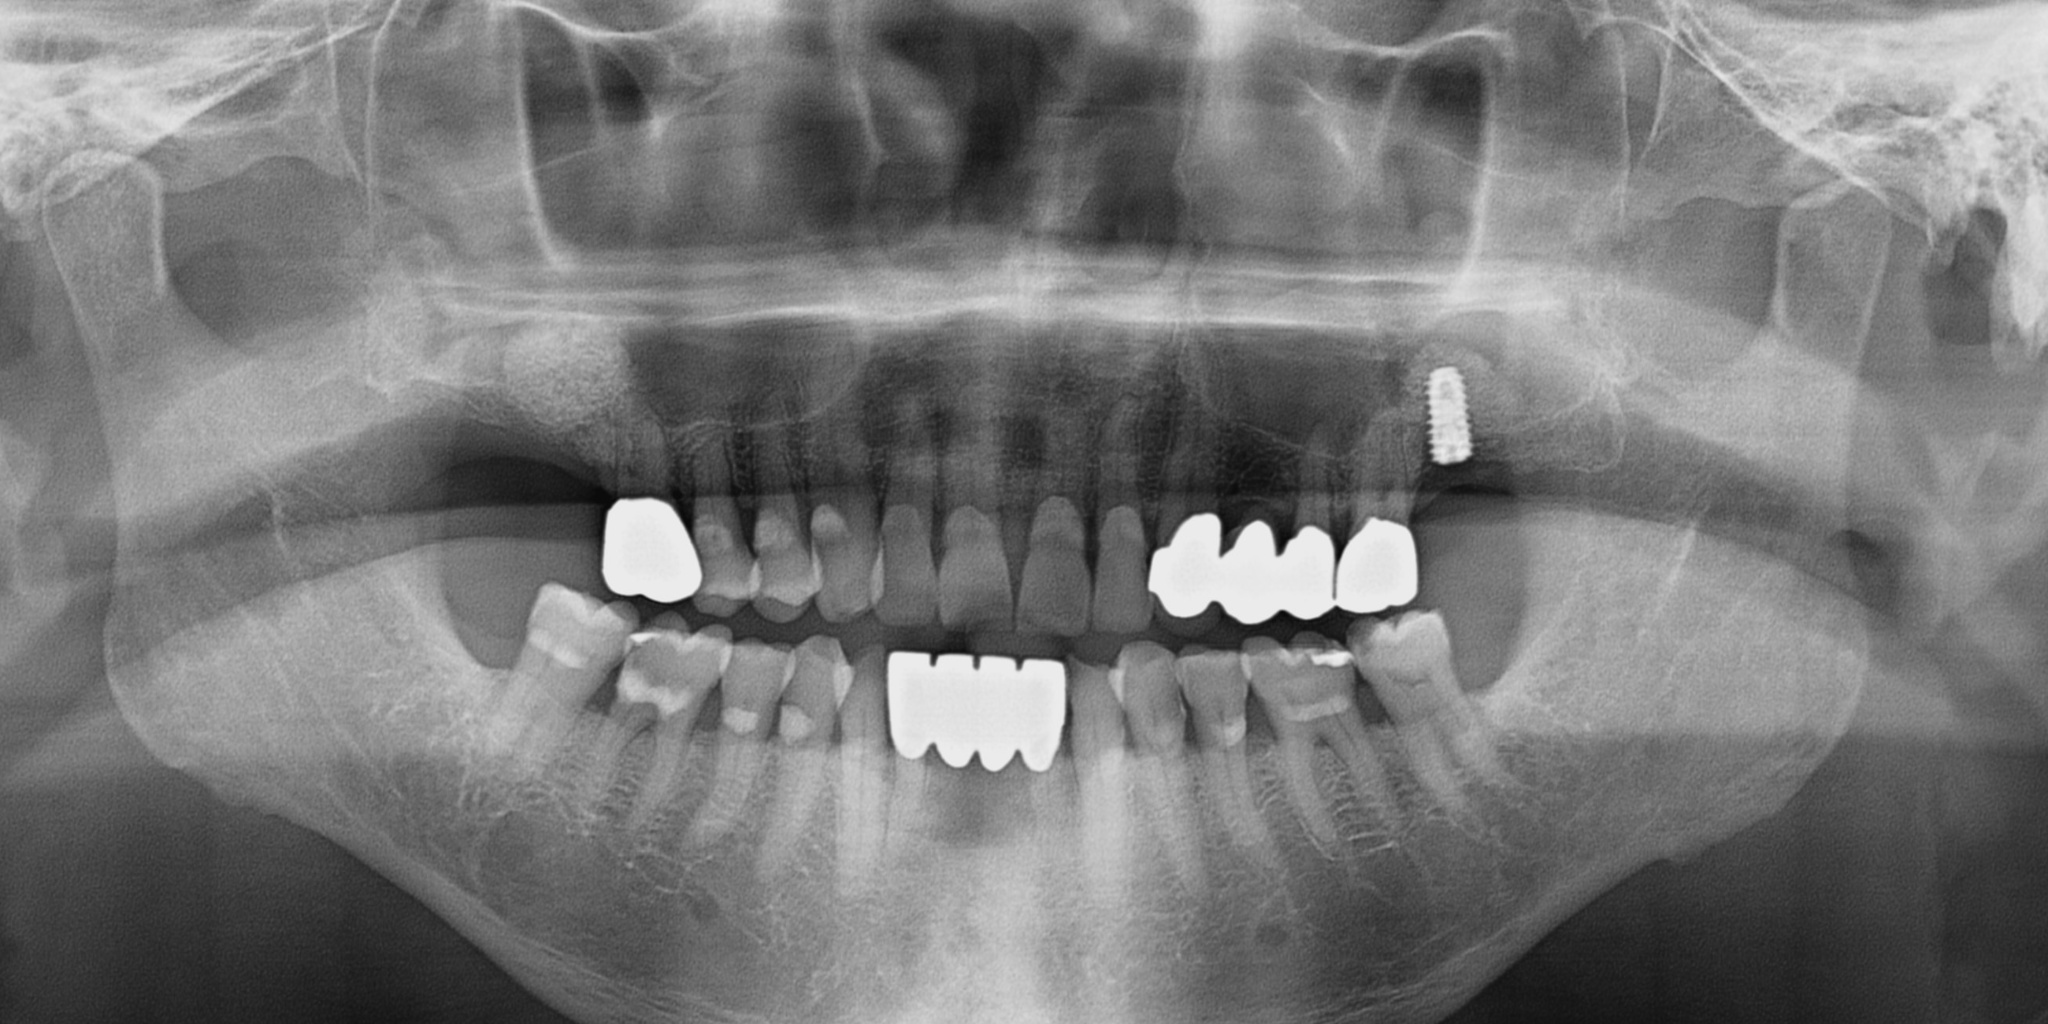

In [96]:
from PIL import Image
import os
f = open('./data/cut.csv', 'r', encoding='utf-8-sig')
rdr = csv.reader(f)

for paths in rdr:
    im=Image.open(os.path.join('./data/processed/R/',paths[0]+'.jpg'))
    display(im)
    break

# Image concatenation

Preparing DataLoader for the evaluation phase...


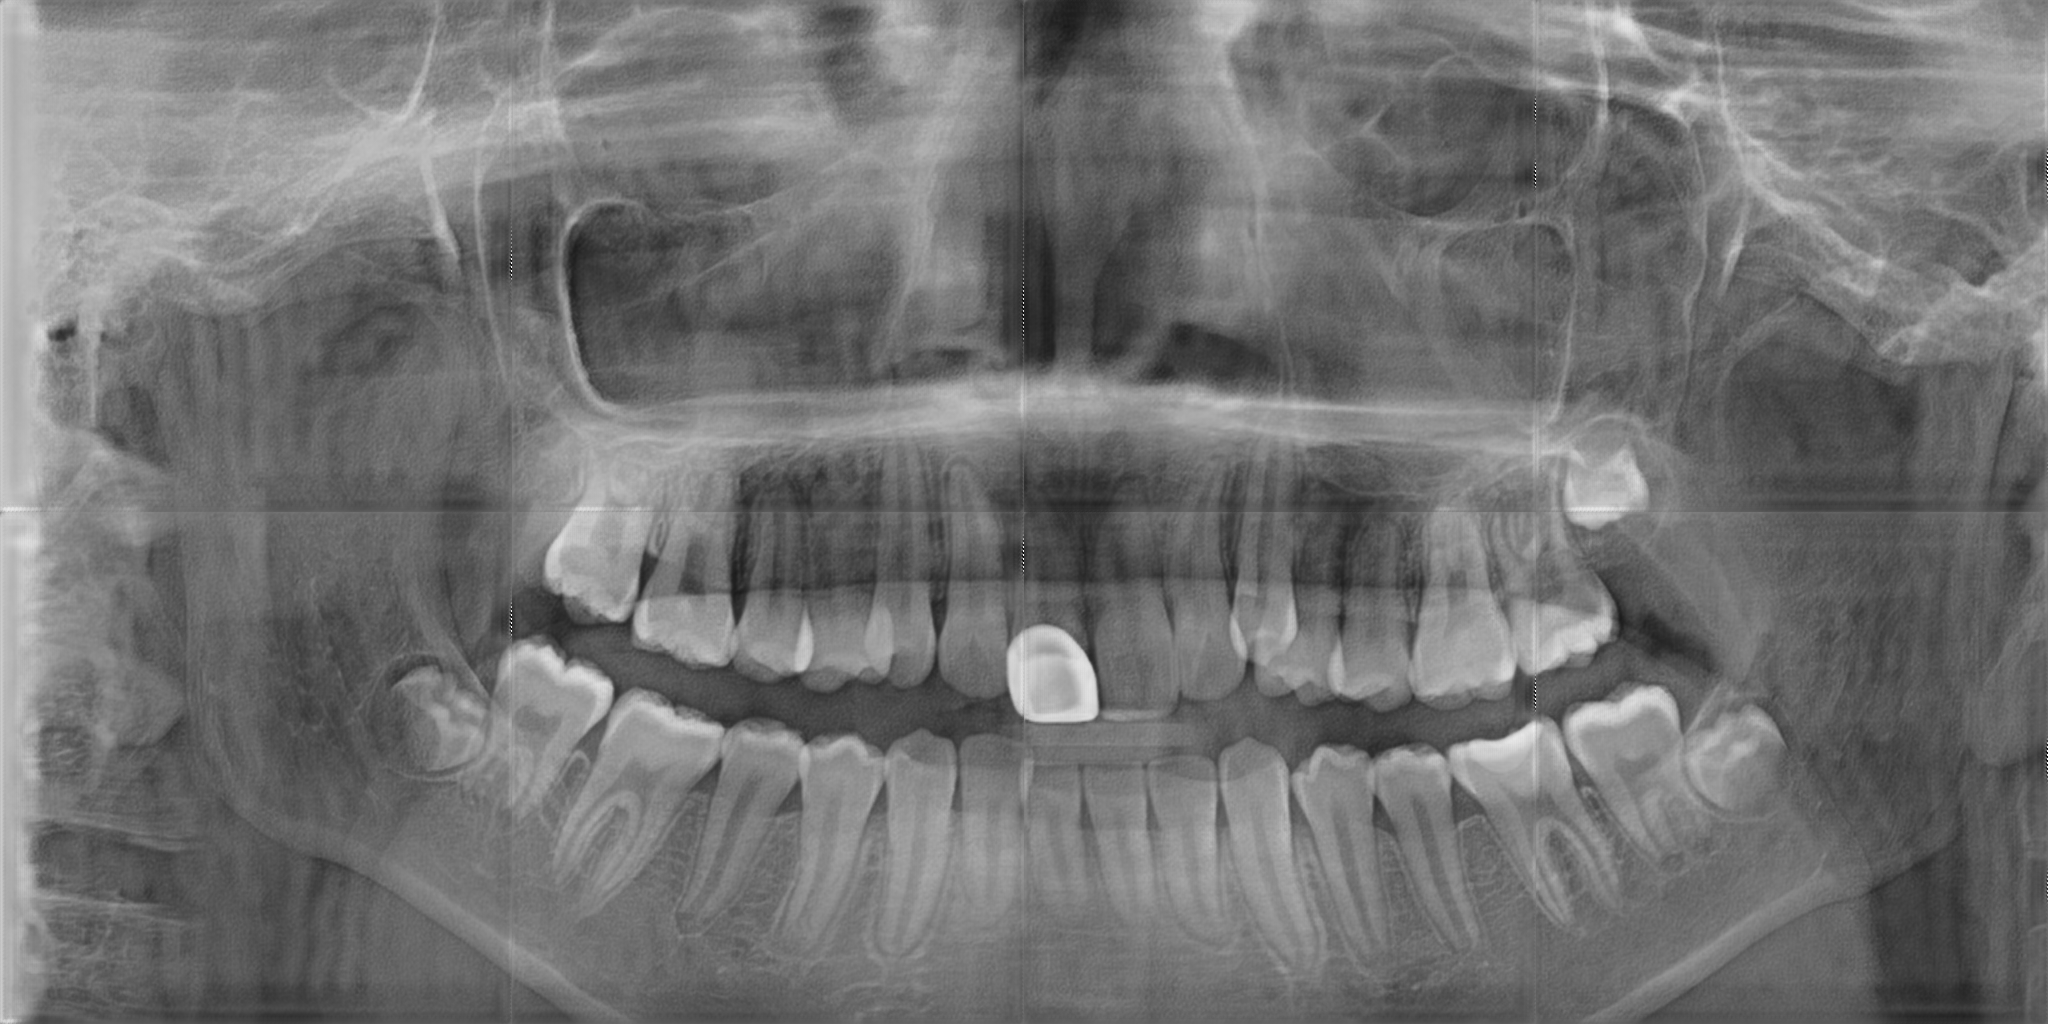

(1024, 2048, 3)


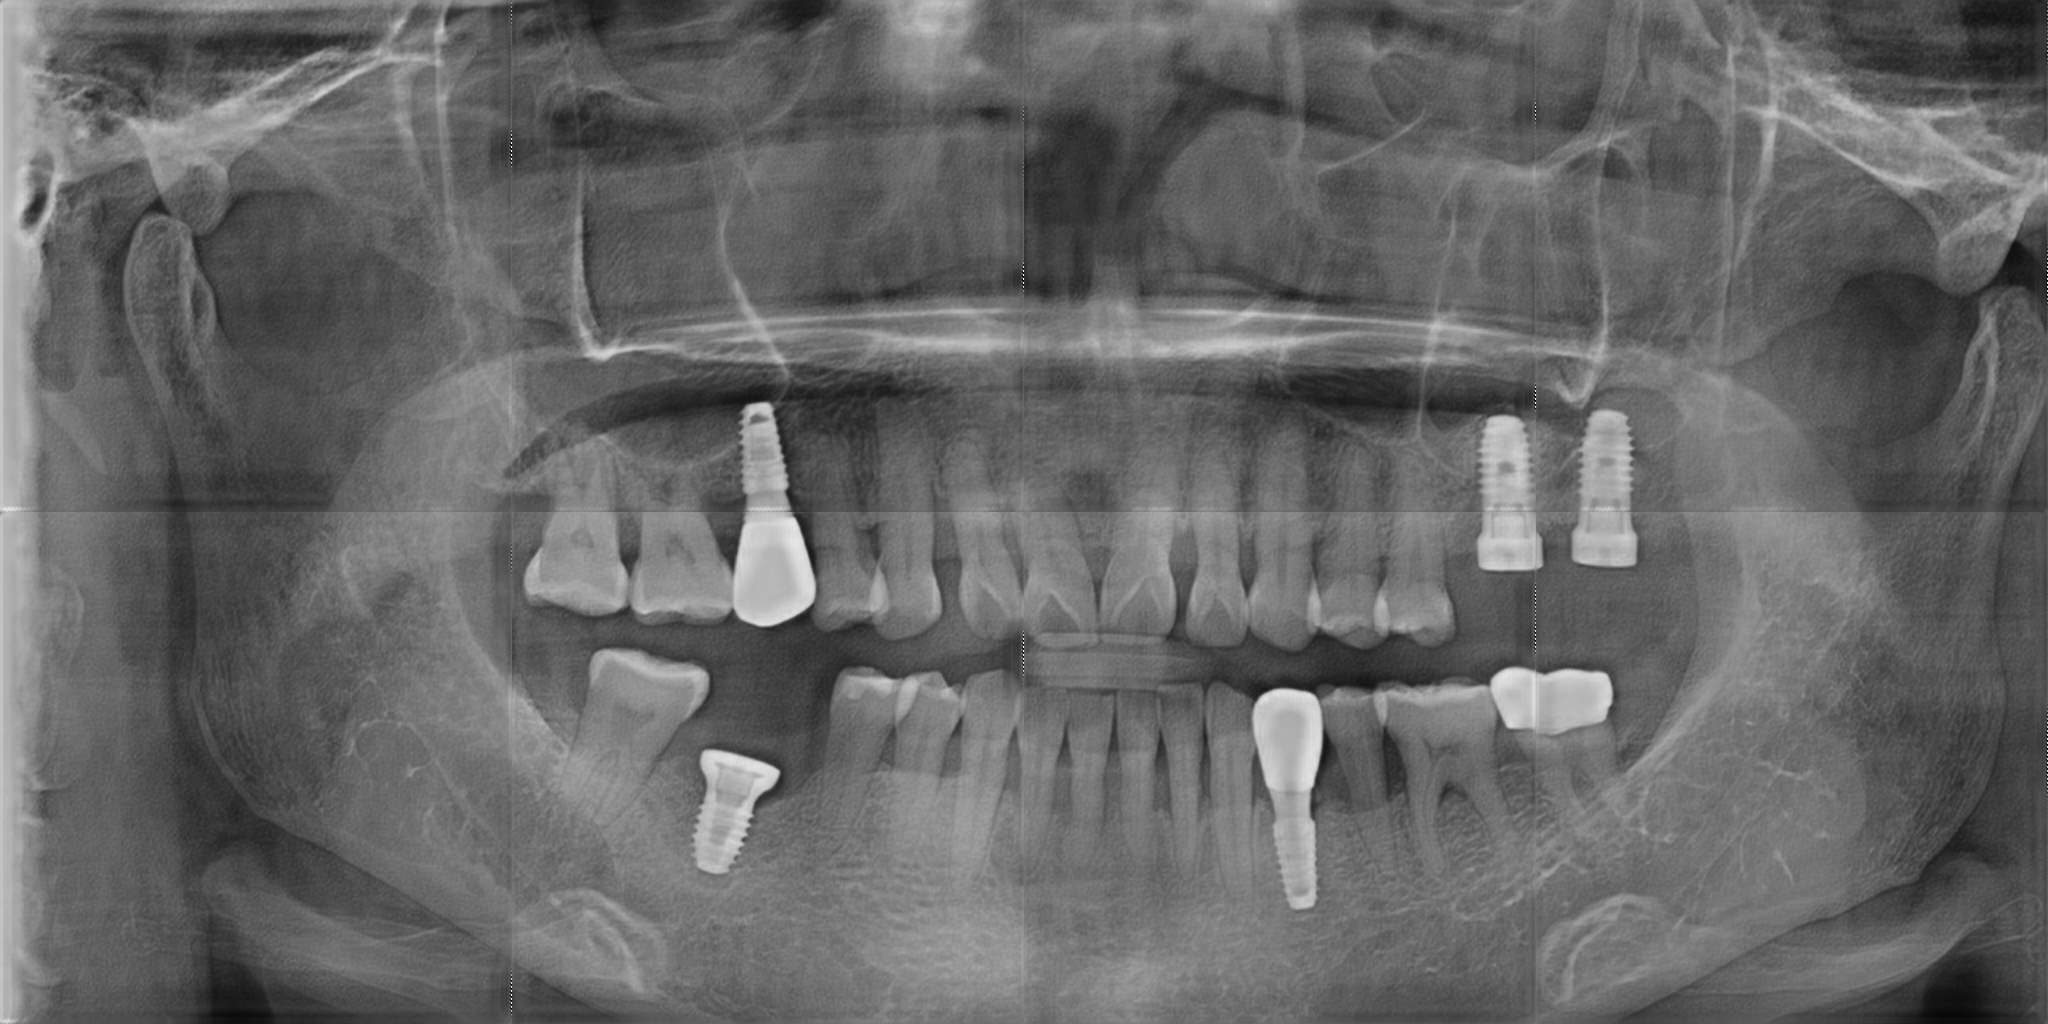

(1024, 2048, 3)


In [8]:
import numpy as np
from datasets.dataloader import *
from models.base_model import *
import torch
from PIL import Image
import glob


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loader=get_eval_loader(root="./data/processed/V", batch_size=1, shuffle=False)

model=BaseGenerator().to(device).eval()
#checkpoint=torch.load('./checkpoints/CycleGAN/Base/checkpoint-epoch-60.ckpt')
checkpoint=torch.load('./checkpoints/CycleGAN/Base/checkpoint-epoch-20.ckpt')
model.load_state_dict(checkpoint['G_state_dict'])
torch_to_image = transforms.Compose([
        transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
        transforms.ToPILImage()
    ])
k=0

for im in loader:
    new_img=Image.new('RGB',(im.shape[3],im.shape[2]))
    
    for i,sub_image in enumerate(im.chunk(2,dim=2)):
        for j,sub_im in enumerate(sub_image.chunk(4,dim=3)):
            result=model(sub_im.to(device))
            result=torch.cat([result,result,result],1)
            result=torch_to_image(result[0])
            new_img.paste(result,(j*sub_im.shape[3],i*sub_im.shape[2]))
    display(new_img)
    print(np.array(new_img).shape)
    #new_img.save("./generated_images/CycleGAN_Sample/{}.jpg".format(k))
    k+=1
    if k==2:
        break



# CSV

### 가지고있는 데이터 양 인덱스에 맞춰 clustering

In [103]:

import csv
import numpy as np
f = open('./data/환자.csv', 'r', encoding='utf-8-sig')
rdr = csv.reader(f)


k=open("./data/cut.csv",'w',newline="")

k=csv.writer(k)


i=0
for line in rdr:
    R=line[0]
    V=line[1]
    
    R=R.replace(" ","")
    R=R.split(",")
    V=V.replace(" ","")
    V=V.split(",")
    writR=[]
    for r in R:
        if int(r[1:])<=4014:
            writR.append(r)
    
    writV=[]
    
    for v in V:
        if int(v[1:])<=3554:
            writV.append(v)
    
    k.writerow(writR+writV)
    #print(writR+writV)
    #for j in line[0]:
    #    print(j)
    #    j=j.replace(" ","")
    #    j=j.split(',')
    #    print(j)

k.close()

AttributeError: '_csv.writer' object has no attribute 'close'

In [79]:
f=open("./data/cut.csv",'w',newline="")

f=csv.writer(f)

f.writerow(writR)
f.writerow([2,'dg'])

f.close()


AttributeError: '_csv.writer' object has no attribute 'close'

In [88]:
import csv
import numpy as np
f = open('./data/cut.csv', 'r', encoding='utf-8-sig')
rdr = csv.reader(f)

for i in rdr:
    print(i)

['R00019', 'V01666']
['R00029', 'V01671']
['R00079', 'V01696']
['R00183', 'V01763']
['R00205', 'V01777']
['R00250', 'V01225']
['R00383', 'V01875']
['R00422', 'V00507']
['R00436', 'V01909']
['R00511', 'V01188']
['R00569', 'V01968']
['R00803', 'V00772']
['R01123', 'V01204']
['R01132', 'V00244']
['R01665', 'V02509']
['R01756', 'V02547']
['R01929', 'V02617']
['R02307', 'V00303']
['R02343', 'V02780']
['R02563', 'V00850']
['R02577', 'V01514']
['R02619', 'V00457']
['R02753', 'V02959']
['R02763', 'V00542']
['R02769', 'V02963']
['R02887', 'V03020']
['R02951', 'V03049']
['R03263', 'V03204']
['R03270', 'V00102']
['R03294', 'V00434']
['R03355', 'V00070']
['R03685', 'V03411']
